In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/prith/OneDrive/Documents/aiml project/startup.csv')

In [3]:
df.head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,wealth bucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13-01-2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10-01-2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12-12-2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06-12-2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03-12-2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [4]:
df.shape

(3044, 10)

In [5]:
#features data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   Investment Type    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
#Data Type of Date column was object but after using to_datetime(), it got converted into a date time object.
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors = 'coerce')

In [7]:
#Data Pre processing

In [8]:
#Replacing the commas in 'Amount in USD' feature
df['Amount in USD'] = df['Amount in USD'].apply(lambda x: str(x).replace(',', ''))

In [9]:
# Fixing the faulty values in 'Amount in USD' feature
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("unknown", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("14342000+", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
df['Amount in USD'] = df['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))

In [10]:
# Converting to numeric data-type
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'])

In [11]:
# Checking for most frequent values in 'Amount in USD'
df['Amount in USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

0.0           32.16 %
1000000.0      5.45 %
500000.0       3.55 %
2000000.0      2.27 %
3000000.0      2.17 %
5000000.0      2.17 %
10000000.0     1.97 %
100000.0       1.87 %
150000.0       1.48 %
200000.0       1.45 %
Name: Amount in USD, dtype: object

In [12]:
# Replacing 0 in 'Amount in USD' with null values
df['Amount in USD'] = df['Amount in USD'].replace(0, np.nan)

In [13]:
# Replacing null values with mean
df['Amount in USD'].fillna(df['Amount in USD'].mean(), inplace = True)

In [14]:
# Fixing the faulty values in 'Date' column
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '12/05.2015'] = '12/05/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '13/04.2015'] = '13/04/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '15/01.2015'] = '15/01/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '22/01//2015'] = '22/01/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '01/07/015'] = '01/07/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '\\xc2\\xa010/7/2015'] = '10/07/2015'
df['Date dd/mm/yyyy'][df['Date dd/mm/yyyy'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [15]:
# Dropping the 'Remarks' feature as it contains 86.24% null values
df.drop('Remarks', axis = 1, inplace = True)

In [16]:
# Replacing 'Bengaluru' with the more common name 'Bangalore' in the dataset
df['City  Location'][df['City  Location'] == 'Bengaluru'] = 'Bangalore'

In [17]:
# Removing the space in 'Ola Cabs' as it gives two different words in WordCloud
df['Startup Name'][df['Startup Name'] == 'Ola Cabs'] = 'OlaCabs'

In [18]:
# Replacing 'Undisclosed investors' with a common name 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
df['Investors Name'][df['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'

In [19]:
# Replacing with more common word
df['Investment Type'][df['Investment Type'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
df['Investment Type'][df['Investment Type'] == 'Seed\\\\nFunding'] = 'Seed Funding'
df['Investment Type'][df['Investment Type'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
df['Investment Type'][df['Investment Type'] == 'Seed/Angel Funding'] = 'Seed / Angel Funding'
df['Investment Type'][df['Investment Type'] == 'Angel / Seed Funding'] = 'Seed / Angel Funding'

In [20]:
#Number of Fundings by Industry
fundings_count_industry = pd.DataFrame(df['Industry Vertical'].value_counts().sort_values(ascending=False))[:10]
fundings_count_industry.rename(columns={'Industry Vertical':'Number of Fundings by Industry'}, inplace=True)
fundings_count_industry.head()

,Number of Fundings by Industry
Consumer Internet,941
Technology,478
eCommerce,186
Healthcare,70
Finance,62


<AxesSubplot:ylabel='Industry Vertical'>

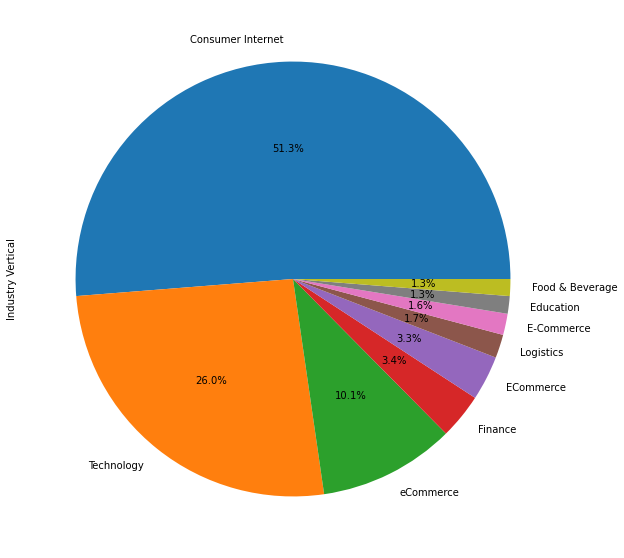

In [21]:
#share of funding by industry
df['Industry Vertical'].value_counts()[:3].append(df['Industry Vertical'].value_counts()[4:10]).plot(kind = 'pie', figsize = (10, 10),autopct='%.1f%%')

In [22]:
#percentage of cities
freq_city = df['City  Location'].value_counts().head(10)
freq_city
percent = freq_city/df.shape[0] * 100
percent

Bangalore    27.628121
Mumbai       18.626807
New Delhi    13.830486
Gurgaon       9.428384
Pune          3.449409
Hyderabad     3.252300
Chennai       3.186597
Noida         3.022339
Gurugram      1.642576
Ahmedabad     1.248357
Name: City  Location, dtype: float64

<AxesSubplot:xlabel='Count', ylabel='City  Location'>

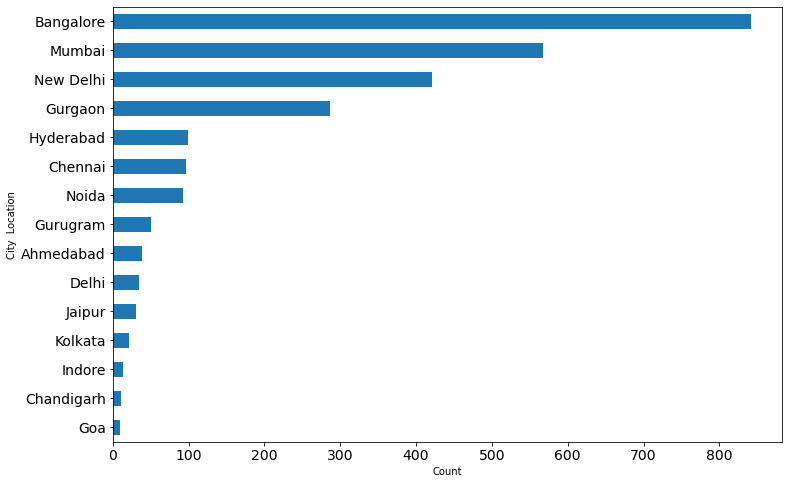

In [23]:
# which city are most funded 
plt.xlabel('Count')
plt.ylabel('City  Location')
City_Count = df['City  Location'].value_counts()
City_Count[:4].append(City_Count[5:16]).sort_values(ascending=True).plot(kind='barh', fontsize=14, figsize=(12, 8))

Seed Funding                   1385
Private Equity                 1356
Seed / Angel Funding            138
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
Seed Round                        7
Pre-Series A                      4
Private Equity Round              4
Seed                              4
Seed / Angle Funding              3
pre-Series A                      2
Corporate Round                   2
Series F                          2
Equity                            2
Series E                          2
Venture Round                     2
Angel Funding                     1
Crowd Funding                     1
Seed Funding Round                1
Term Loan                         1
Venture                           1
Angel Round                       1
Crowd funding                     1
Bridge Round                      1
Angel                       

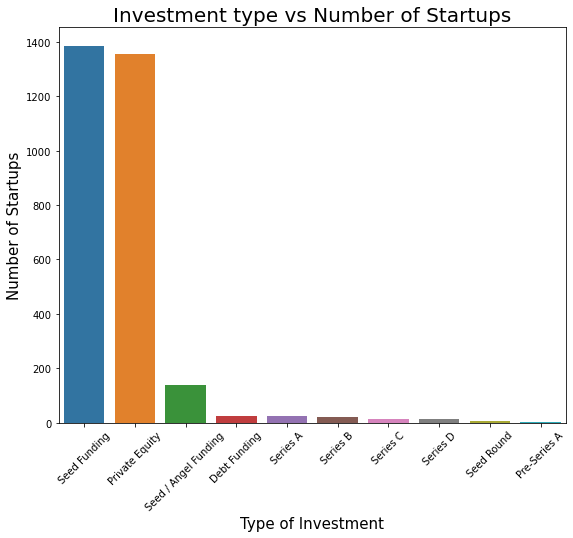

In [24]:
#investment types
import seaborn as sns
i_type = df['Investment Type'].value_counts()
plt.figure(figsize=(20,16))

plt.subplot(221)

print(i_type)

g=sns.barplot (x=i_type.index[:10],y=i_type.values[:10])
g.set_xticklabels(g.get_xticklabels(), rotation=45)

g.set_xlabel("Type of Investment", fontsize=15)

g.set_ylabel("Number of Startups", fontsize=15)

g.set_title("Investment type vs Number of Startups", fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Startups Funded Per Year'}, xlabel='Year', ylabel='count'>

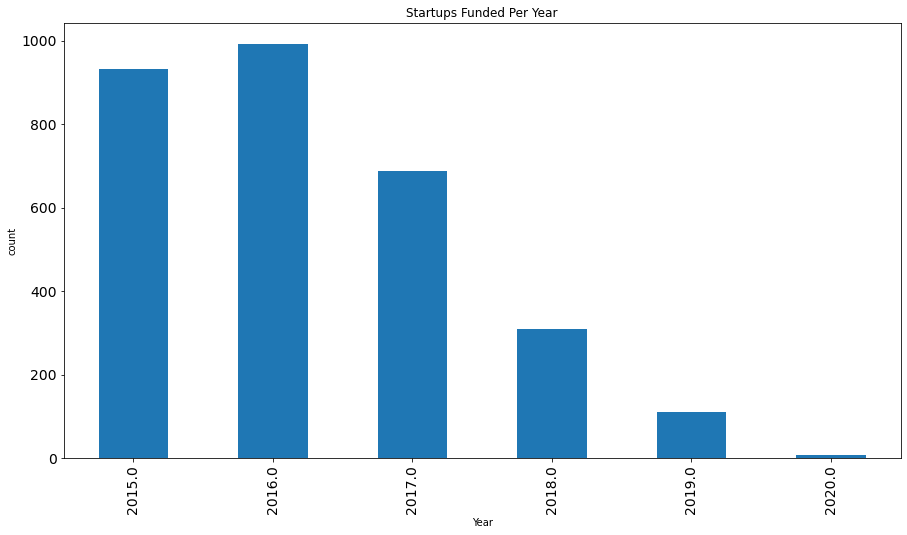

In [25]:
#startups funded per year
df20 = pd.read_csv(r"C:\Users\prith\OneDrive\Documents\aiml project\startup_funding.csv")
df20['Date'] = pd.to_datetime(df20['Date'], errors = 'coerce')
plt.xlabel("Year")
plt.ylabel("count")
plt.title("Startups Funded Per Year")
df20.Date.dt.year.value_counts().sort_index().plot(kind='bar', figsize = (15, 8), fontsize = 14)

<AxesSubplot:xlabel='Date'>

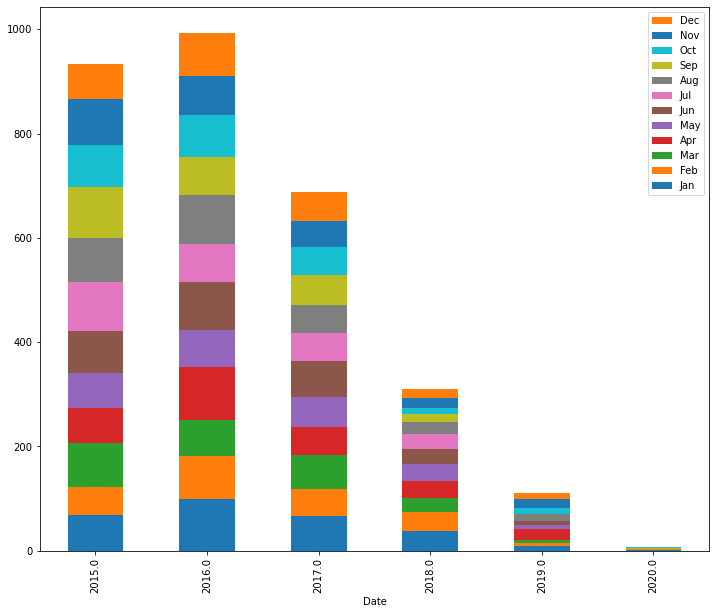

In [26]:
#startups by month in year
df20['Date'] = pd.to_datetime(df20['Date'], errors = 'coerce')
ser = df20.Date.groupby([df20.Date.dt.year, df20.Date.dt.month]).count().unstack(level = -1)
ser.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
ser.plot(kind = 'bar',stacked = True, figsize = (12, 10), legend = 'reverse')

In [27]:
#highest investor
funding_count_investor = pd.DataFrame(df['Investors Name'].value_counts()).sort_values(by='Investors Name', ascending=False)[:10]
funding_count_investor.rename(columns={'InvestorsName': 'Number of Investments by Investor'}, inplace=True)
funding_count_investor.drop(funding_count_investor[funding_count_investor.index == 'Undisclosed Investors'].index, inplace=True)
funding_count_investor.head()

,Investors Name
Ratan Tata,25
Indian Angel Network,23
Kalaari Capital,16
Sequoia Capital,15
Group of Angel Investors,15


In [28]:
#detail of one sample starup company by name
df[df['Startup Name']=='Meesho']

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
49,50,1575763200000000000,Meesho,E-Commerce,Social Commerce,Bangalore,Naspers,Series D,1.250000e+08
128,129,1528675200000000000,Meesho,Ecommerce,Social Commerce,Bangalore,"Shunwei Capital, DST Partners and RPS Ventures",Series C,5.000000e+07
231,232,1530835200000000000,Meesho,Consumer Internet,Online Marketplace For Resellers,Bangalore,"Sequoia Capital India, SAIF Partners, Y Combin...",Private Equity,1.150000e+07
542,543,1510272000000000000,Meesho,ECommerce,Online Reseller Network,Bangalore,"SAIF Partners, YCombinator, Venture Highway",Private Equity,3.100000e+06
1456,1457,1471478400000000000,Meesho,eCommerce,Mobile based eCommerce SAAS platform,Bangalore,"Kashyap Deorah, Rajul Garg, Maninder Gulati",Seed Funding,1.842990e+07
1683,1684,1465084800000000000,Meesho,eCommerce,Social commerce platform,Bangalore,Rajul Garg & Others,Seed Funding,1.842990e+07


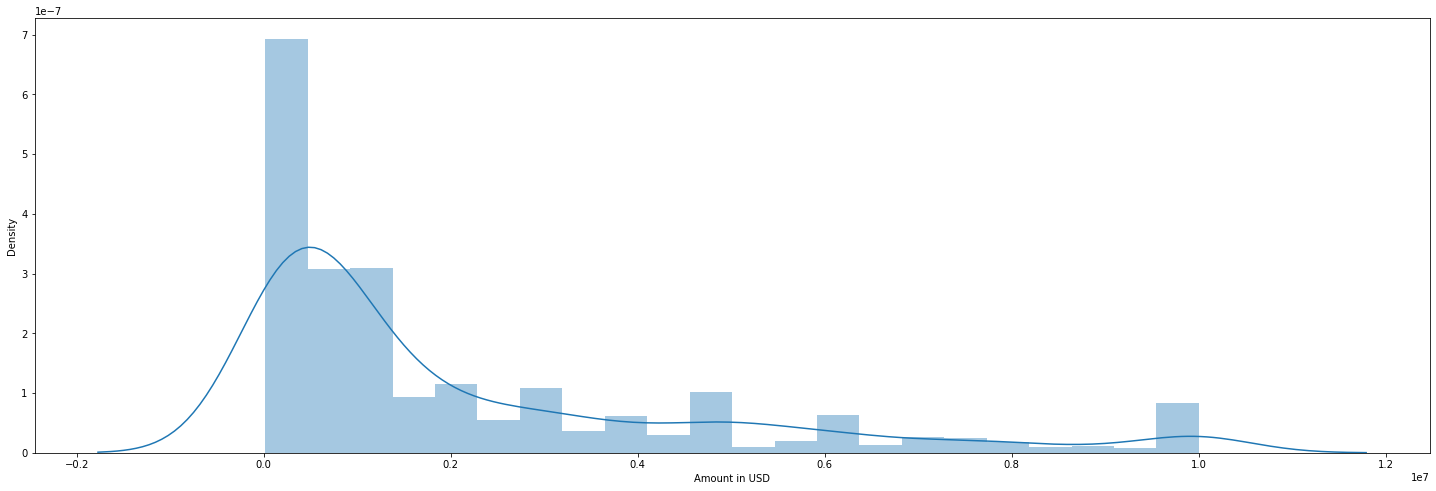

In [29]:
plt.figure(figsize=(25,8))
sns.distplot(df.loc[df['Amount in USD']<=10000000.0, 'Amount in USD'])
plt.show()

In [30]:
#number of investments by investors
funding_count_company = pd.DataFrame(df['Startup Name'].value_counts()).sort_values(by='Startup Name', ascending=False)[:15]
funding_count_company.rename(columns={'StartupName': 'Number of Investments by Investor'}, inplace=True)
funding_count_company.head()

,Startup Name
OlaCabs,8
Swiggy,8
Paytm,7
Meesho,6
Medinfi,6


In [31]:
#highest valuation
df[df['Amount in USD']==df['Amount in USD'].max()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
60,61,1566864000000000000,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09


In [32]:
#more than 1billion valuation
df[df['Amount in USD']>=1000000000]['Startup Name'].unique()

array(['Paytm', 'Rapido Bike Taxi', 'Flipkart'], dtype=object)

In [33]:
#lowest valuation
df[df['Amount in USD']==df['Amount in USD'].min()]

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
3017,3018,1421625600000000000,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3018,3019,1421625600000000000,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3019,3020,1421625600000000000,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3020,3021,1421625600000000000,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3021,3022,1421625600000000000,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


In [34]:
#detail of one sample starup company by name
df[df['Startup Name']=='Meesho']

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
49,50,1575763200000000000,Meesho,E-Commerce,Social Commerce,Bangalore,Naspers,Series D,1.250000e+08
128,129,1528675200000000000,Meesho,Ecommerce,Social Commerce,Bangalore,"Shunwei Capital, DST Partners and RPS Ventures",Series C,5.000000e+07
231,232,1530835200000000000,Meesho,Consumer Internet,Online Marketplace For Resellers,Bangalore,"Sequoia Capital India, SAIF Partners, Y Combin...",Private Equity,1.150000e+07
542,543,1510272000000000000,Meesho,ECommerce,Online Reseller Network,Bangalore,"SAIF Partners, YCombinator, Venture Highway",Private Equity,3.100000e+06
1456,1457,1471478400000000000,Meesho,eCommerce,Mobile based eCommerce SAAS platform,Bangalore,"Kashyap Deorah, Rajul Garg, Maninder Gulati",Seed Funding,1.842990e+07
1683,1684,1465084800000000000,Meesho,eCommerce,Social commerce platform,Bangalore,Rajul Garg & Others,Seed Funding,1.842990e+07


In [35]:
funding_average = df['Amount in USD'].mean()
funding_meadian = df['Amount in USD'].median()
print("Average :", funding_average)
print("Median :", funding_meadian)

Average : 18429897.27080815
Median : 7450000.0
